# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [85]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [86]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | abha
Processing Record 2 of Set 1 | orodara
Processing Record 3 of Set 1 | vardo
Processing Record 4 of Set 1 | clyde river
Processing Record 5 of Set 1 | amderma
City not found. Skipping...
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | pevek
Processing Record 9 of Set 1 | kalabo
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | lasa
Processing Record 13 of Set 1 | kavaratti
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | arcachon
Processing Record 16 of Set 1 | hasaki
Processing Record 17 of Set 1 | black river
Processing Record 18 of Set 1 | bambanglipuro
Processing Record 19 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 20 of Set 1 | akkermanovka
Processing Record 21 of Set 1 | norman wells
Processing Record 22 of Set 1 |

Processing Record 42 of Set 4 | kiunga
Processing Record 43 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 44 of Set 4 | jacareacanga
Processing Record 45 of Set 4 | christchurch
Processing Record 46 of Set 4 | rawson
Processing Record 47 of Set 4 | mar del plata
Processing Record 48 of Set 4 | kaitangata
Processing Record 49 of Set 4 | council bluffs
Processing Record 0 of Set 5 | devonport
Processing Record 1 of Set 5 | esperance
Processing Record 2 of Set 5 | opuwo
Processing Record 3 of Set 5 | adrar
Processing Record 4 of Set 5 | husavik
Processing Record 5 of Set 5 | roswell
Processing Record 6 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 5 | tombouctou
Processing Record 8 of Set 5 | mosquera
Processing Record 9 of Set 5 | san cristobal
Processing Record 10 of Set 5 | aswan
Processing Record 11 of Set 5 | souillac
Processing Record 12 of Set 5 | tuktoyaktuk
Processing Record 13 of Set 5 | bambous virieux
Processing Record 1

Processing Record 30 of Set 8 | manglaur
Processing Record 31 of Set 8 | vostok
Processing Record 32 of Set 8 | bandarbeyla
Processing Record 33 of Set 8 | isangel
Processing Record 34 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 35 of Set 8 | fairview
Processing Record 36 of Set 8 | san patricio
Processing Record 37 of Set 8 | alta floresta
Processing Record 38 of Set 8 | biak
Processing Record 39 of Set 8 | nishihara
Processing Record 40 of Set 8 | tazovskiy
Processing Record 41 of Set 8 | boden
Processing Record 42 of Set 8 | tondano
Processing Record 43 of Set 8 | palu
Processing Record 44 of Set 8 | bengkulu
Processing Record 45 of Set 8 | tunceli
Processing Record 46 of Set 8 | ambilobe
Processing Record 47 of Set 8 | quelimane
Processing Record 48 of Set 8 | puerto maldonado
Processing Record 49 of Set 8 | sao felix do xingu
Processing Record 0 of Set 9 | ruwi
Processing Record 1 of Set 9 | goderich
Processing Record 2 of Set 9 | lincoln
Processing Record

Processing Record 20 of Set 12 | jian
Processing Record 21 of Set 12 | karla
Processing Record 22 of Set 12 | sorland
Processing Record 23 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 24 of Set 12 | portobelo
Processing Record 25 of Set 12 | del rio
Processing Record 26 of Set 12 | kalmunai
Processing Record 27 of Set 12 | kruisfontein
Processing Record 28 of Set 12 | pareora
Processing Record 29 of Set 12 | gogaran
Processing Record 30 of Set 12 | orzhytsya
Processing Record 31 of Set 12 | itamaraju
Processing Record 32 of Set 12 | berlevag
Processing Record 33 of Set 12 | turbat
Processing Record 34 of Set 12 | jiuquan
Processing Record 35 of Set 12 | toora-khem
Processing Record 36 of Set 12 | maputo
Processing Record 37 of Set 12 | osakarovka
Processing Record 38 of Set 12 | port-gentil
Processing Record 39 of Set 12 | revda
Processing Record 40 of Set 12 | viloco
Processing Record 41 of Set 12 | menton
-----------------------------
Data Retrieval Complete     

In [90]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [91]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,abha,18.2164,42.5053,13.90,82,0,0.00,SA,1675881024
1,orodara,10.9492,-4.9342,30.01,23,62,1.62,BF,1675881025
2,vardo,70.3705,31.1107,1.99,75,0,7.20,NO,1675880674
3,clyde river,70.4692,-68.5914,-36.87,67,20,3.09,CA,1675880682
4,kapaa,22.0752,-159.3190,24.18,79,20,9.26,US,1675880514


In [92]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [94]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,abha,18.2164,42.5053,13.90,82,0,0.00,SA,1675881024
1,orodara,10.9492,-4.9342,30.01,23,62,1.62,BF,1675881025
2,vardo,70.3705,31.1107,1.99,75,0,7.20,NO,1675880674
3,clyde river,70.4692,-68.5914,-36.87,67,20,3.09,CA,1675880682
4,kapaa,22.0752,-159.3190,24.18,79,20,9.26,US,1675880514


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

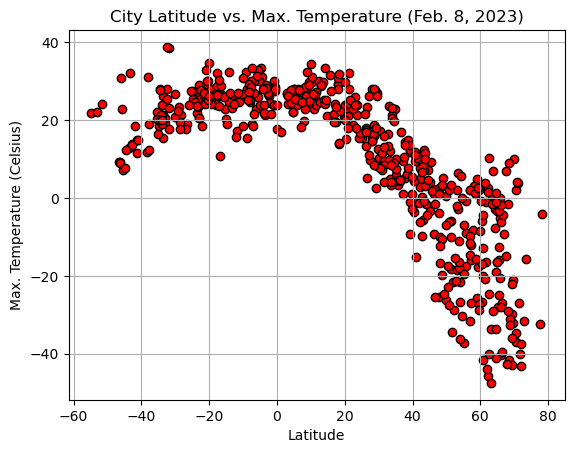

In [96]:
# Build scatter plot for latitude vs. temperature
lat_x = city_data_df["Lat"]
temp_y = city_data_df["Max Temp"]
fig1 = plt.scatter(lat_x, temp_y, facecolors="red", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max. Temperature (Feb. 8, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (Celsius)")
plt.grid()

# Save the figure
plt.savefig("../output_data/fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

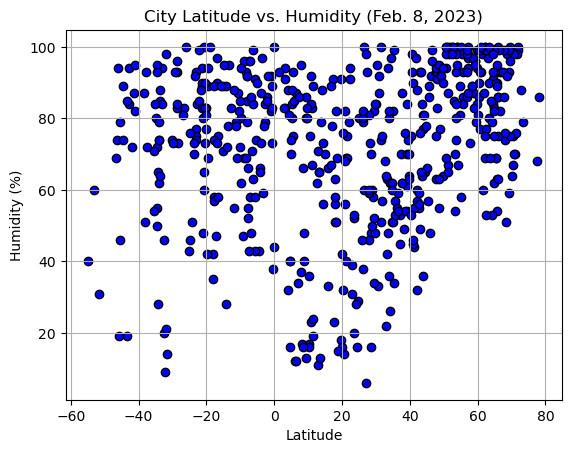

In [97]:
# Build the scatter plots for latitude vs. humidity
lat_x = city_data_df["Lat"]
humid_y = city_data_df["Humidity"]
fig2 = plt.scatter(lat_x, humid_y, facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Feb. 8, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

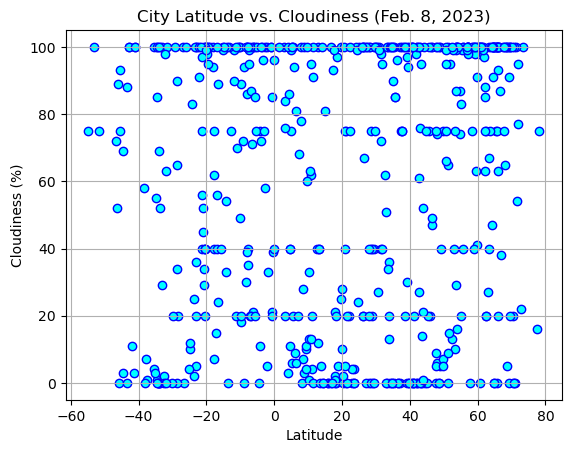

In [98]:
# Build the scatter plots for latitude vs. cloudiness
lat_x = city_data_df["Lat"]
clouds_y = city_data_df["Cloudiness"]
fig3 = plt.scatter(lat_x, clouds_y, facecolors="cyan", edgecolors="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Feb. 8, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
# Save the figure
plt.savefig("../output_data/fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

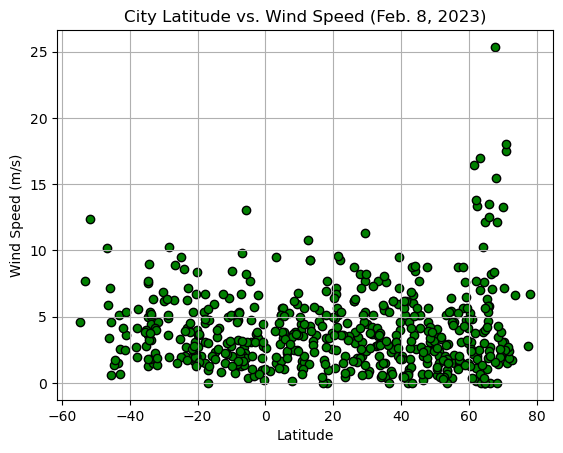

In [99]:
# Build the scatter plots for latitude vs. wind speed
lat_x = city_data_df["Lat"]
wind_y = city_data_df["Wind Speed"]
fig4 = plt.scatter(lat_x, wind_y, facecolors="green", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Feb. 8, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [100]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,abha,18.2164,42.5053,13.90,82,0,0.00,SA,1675881024
1,orodara,10.9492,-4.9342,30.01,23,62,1.62,BF,1675881025
2,vardo,70.3705,31.1107,1.99,75,0,7.20,NO,1675880674
3,clyde river,70.4692,-68.5914,-36.87,67,20,3.09,CA,1675880682
4,kapaa,22.0752,-159.3190,24.18,79,20,9.26,US,1675880514


In [101]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,vaini,-21.2000,-175.2000,25.09,94,75,2.57,TO,1675880542
7,kalabo,-14.9700,22.6814,20.33,89,100,2.31,ZM,1675881037
8,port alfred,-33.5906,26.8910,21.21,85,100,3.26,ZA,1675880564
9,puerto ayora,-0.7393,-90.3518,29.98,89,85,4.47,EC,1675880517
16,bambanglipuro,-7.9500,110.2833,24.60,92,100,4.73,ID,1675880765


###  Temperature vs. Latitude Linear Regression Plot

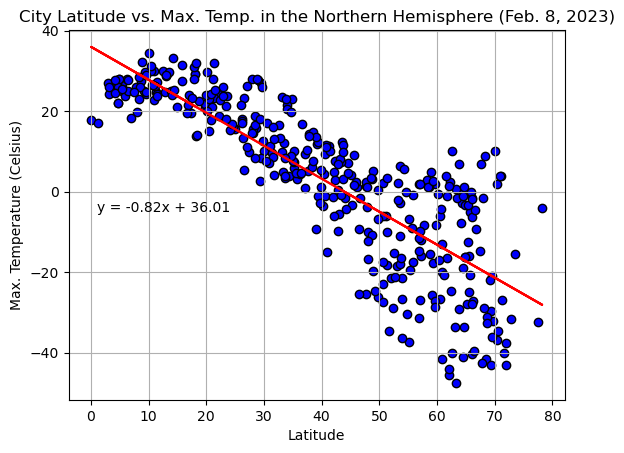

 The correlation between latitude and max. temperature in the Northern Hemisphere is -0.84


In [102]:
# Linear regression on Northern Hemisphere
n_lat_x = northern_hemi_df["Lat"]
n_temp_y = northern_hemi_df["Max Temp"]
fig5 = plt.scatter(n_lat_x, n_temp_y, facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max. Temp. in the Northern Hemisphere (Feb. 8, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (Celsius)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(n_lat_x, n_temp_y)
regress_values = n_lat_x * slope + intercept

m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"

plt.plot (n_lat_x, regress_values, "r-")
plt.plot(n_lat_x, intercept + slope*(n_lat_x), 'r', label='fitted line')

plt.text(1, -5, f"y = {m}x + {b}", fontsize= 10)

plt.show()
print(f" The correlation between latitude and max. temperature in the Northern Hemisphere is {round(rvalue, 2)}")

plt.show()

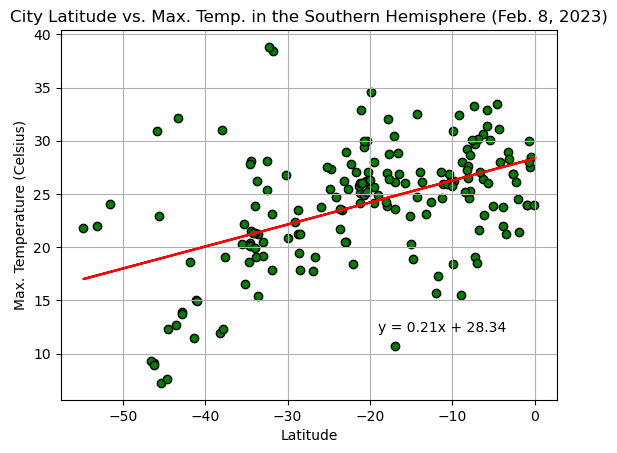

 The correlation between latitude and max. temperature in the Southern Hemisphere is 0.48


In [103]:
# Linear regression on Southern Hemisphere
s_lat_x = southern_hemi_df["Lat"]
s_temp_y = southern_hemi_df["Max Temp"]
fig6 = plt.scatter(s_lat_x, s_temp_y, facecolors="green", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max. Temp. in the Southern Hemisphere (Feb. 8, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (Celsius)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(s_lat_x, s_temp_y)
regress_values = s_lat_x * slope + intercept

m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"

plt.plot (s_lat_x, regress_values, "r-")
plt.plot(s_lat_x, intercept + slope*(s_lat_x), 'r', label='fitted line')

plt.text(-19, 12, f"y = {m}x + {b}", fontsize= 10)

plt.show()
print(f" The correlation between latitude and max. temperature in the Southern Hemisphere is {round(rvalue, 2)}")

plt.show()

**Discussion about the linear relationship:** 

The linear relationship between latitude and temperature shows that max. temperature tends to increase as latitude approaches zero. In the Northern Hemisphere the slope of the linear recression line is -0.84, showing that for each degree in in latitude north (+1), away from the equator, the temperture tends to decrease by 0.84 degrees Celcius. The Southern Hemisphere shows a similar, though less drastic tend, with an increase of 0.21 degrees Celcius for each degree in latitude closer to the equator. The correlation for the Northern Hemisphere is  stronger at 0.84, compared to the Southern Hemisphere at 0.48, meaning that the data points in for the Northern Hemisphere lie closer to the linear recression line while the data points in the Southern Hemipshere are more spread out.

### Humidity vs. Latitude Linear Regression Plot

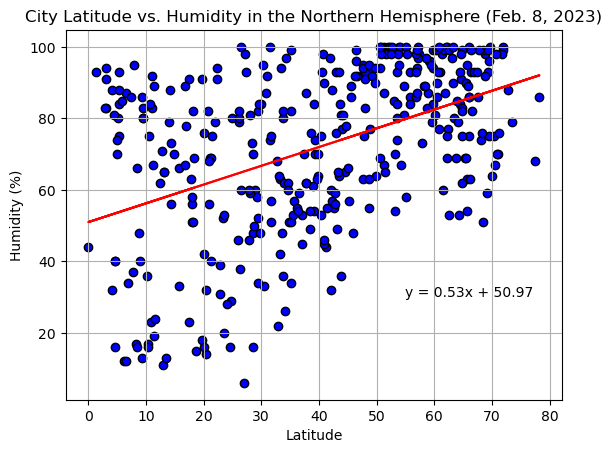

 The correlation between latitude and humidity in the Northern Hemisphere is 0.46


In [104]:
# Linear regression on Northern Hemisphere
n_lat_x = northern_hemi_df["Lat"]
n_humid_y = northern_hemi_df["Humidity"]
fig7 = plt.scatter(n_lat_x, n_humid_y, facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity in the Northern Hemisphere (Feb. 8, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(n_lat_x, n_humid_y)
regress_values = n_lat_x * slope + intercept

m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"

plt.plot (n_lat_x, regress_values, "r-")
plt.plot(n_lat_x, intercept + slope*(n_lat_x), 'r', label='fitted line')

plt.text(55, 30, f"y = {m}x + {b}", fontsize= 10)

plt.show()
print(f" The correlation between latitude and humidity in the Northern Hemisphere is {round(rvalue, 2)}")

plt.show()

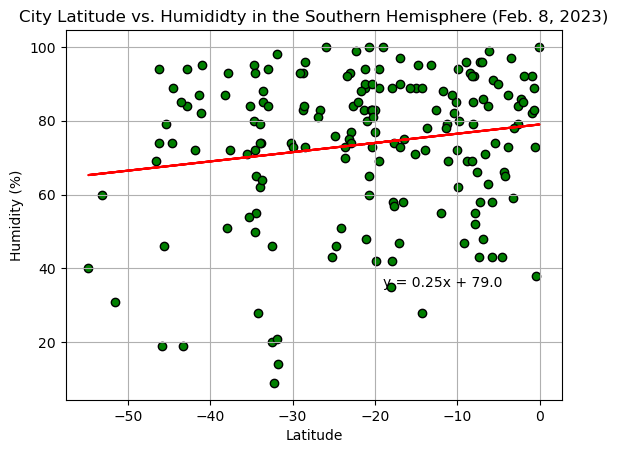

 The correlation between latitude and humidity in the Southern Hemisphere is 0.17


In [105]:
# Linear regression on Southern Hemisphere
s_lat_x = southern_hemi_df["Lat"]
s_humid_y = southern_hemi_df["Humidity"]
fig8 = plt.scatter(s_lat_x, s_humid_y, facecolors="green", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humididty in the Southern Hemisphere (Feb. 8, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(s_lat_x, s_humid_y)
regress_values = s_lat_x * slope + intercept

m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"

plt.plot (s_lat_x, regress_values, "r-")
plt.plot(s_lat_x, intercept + slope*(s_lat_x), 'r', label='fitted line')

plt.text(-19, 35, f"y = {m}x + {b}", fontsize= 10)

plt.show()
print(f" The correlation between latitude and humidity in the Southern Hemisphere is {round(rvalue, 2)}")

plt.show()

**Discussion about the linear relationship:** 

The linear relationship between latitude an humidity shows an opposite relationship in the Northern and Southern Hemispheres. Humidity increases as latitude approaches zero in the Southern Hemisphere, however the Northern Hemisphere shows the opposite tend, decreasing as latitude approaches the equator. The r value for the Southern Hemisphere regression shows a significant spread in the data compared to the linear regression line.

### Cloudiness vs. Latitude Linear Regression Plot

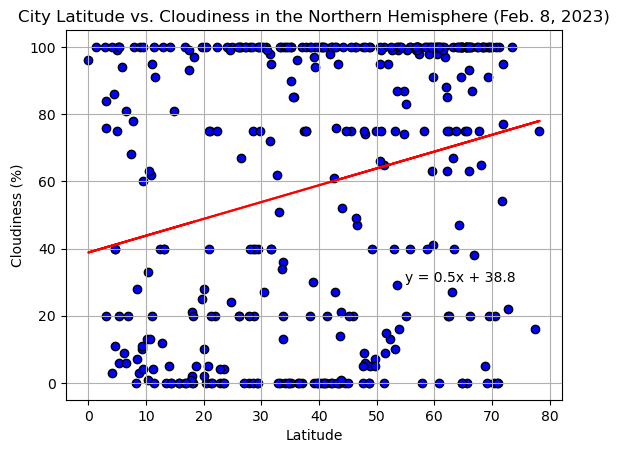

 The correlation between latitude and cloudiness in the Northern Hemisphere is 0.25


In [108]:
# Linear regression on Northern Hemisphere
n_lat_x = northern_hemi_df["Lat"]
n_cloud_y = northern_hemi_df["Cloudiness"]
fig9 = plt.scatter(n_lat_x, n_cloud_y, facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness in the Northern Hemisphere (Feb. 8, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(n_lat_x, n_cloud_y)
regress_values = n_lat_x * slope + intercept

m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"

plt.plot (n_lat_x, regress_values, "r-")
plt.plot(n_lat_x, intercept + slope*(n_lat_x), 'r', label='fitted line')

plt.text(55, 30, f"y = {m}x + {b}", fontsize= 10)

plt.show()
print(f" The correlation between latitude and cloudiness in the Northern Hemisphere is {round(rvalue, 2)}")

plt.show()

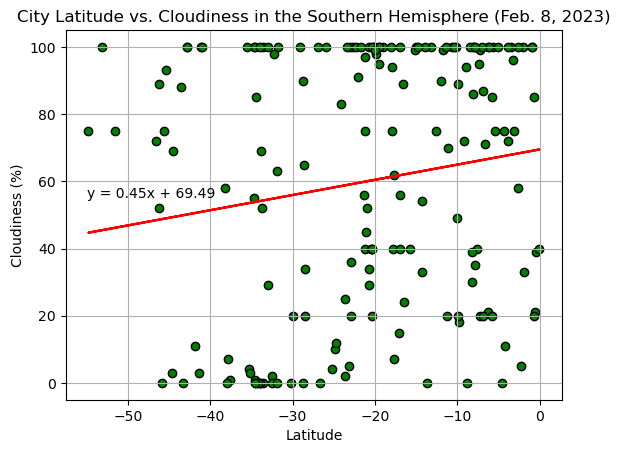

 The correlation between latitude and cloudiness in the Southern Hemisphere is 0.16


In [107]:
# Linear regression on Southern Hemisphere
s_lat_x = southern_hemi_df["Lat"]
s_cloud_y = southern_hemi_df["Cloudiness"]
fig10 = plt.scatter(s_lat_x, s_cloud_y, facecolors="green", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness in the Southern Hemisphere (Feb. 8, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(s_lat_x, s_cloud_y)
regress_values = s_lat_x * slope + intercept

m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"

plt.plot (s_lat_x, regress_values, "r-")
plt.plot(s_lat_x, intercept + slope*(s_lat_x), 'r', label='fitted line')

plt.text(-55, 55, f"y = {m}x + {b}", fontsize= 10)

plt.show()
print(f" The correlation between latitude and cloudiness in the Southern Hemisphere is {round(rvalue, 2)}")

plt.show()

**Discussion about the linear relationship:**

Both the Northern and Southern Hemispheres show a large number of data points at zero and 100% cloud cover, this causes the linear regression line to fall somewhere in the middle and have a low r-value. On this day, cloud cover tended to increase as latitude approached zero in the Southern Hemishpere and decrease as latitude approached zero in the Northern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

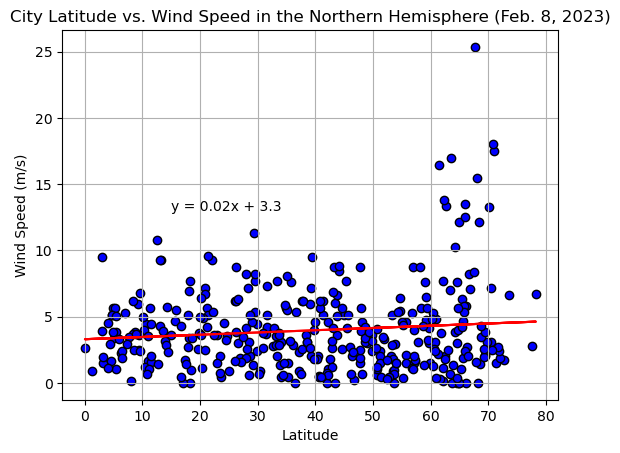

 The correlation between latitude and wind speed in the Northern Hemisphere is 0.11


In [109]:
# Linear regression on Northern Hemisphere
n_lat_x = northern_hemi_df["Lat"]
n_wind_y = northern_hemi_df["Wind Speed"]
fig11 = plt.scatter(n_lat_x, n_wind_y, facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed in the Northern Hemisphere (Feb. 8, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(n_lat_x, n_wind_y)
regress_values = n_lat_x * slope + intercept

m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"

plt.plot (n_lat_x, regress_values, "r-")
plt.plot(n_lat_x, intercept + slope*(n_lat_x), 'r', label='fitted line')

plt.text(15, 13, f"y = {m}x + {b}", fontsize= 10)

plt.show()
print(f" The correlation between latitude and wind speed in the Northern Hemisphere is {round(rvalue, 2)}")

plt.show()

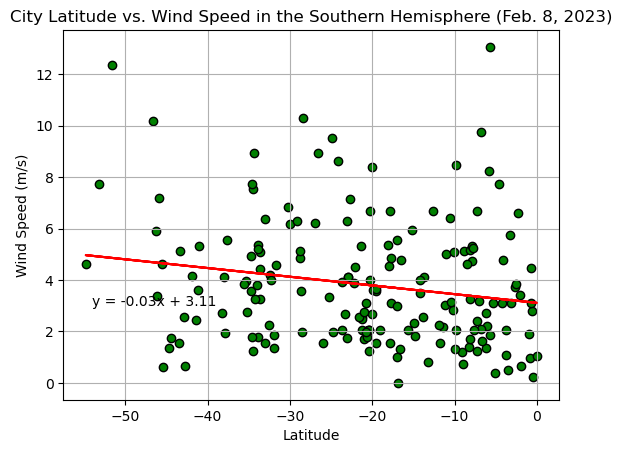

 The correlation between latitude and wind speed in the Southern Hemisphere is -0.19


In [110]:
# Linear regression on Southern Hemisphere
s_lat_x = southern_hemi_df["Lat"]
s_wind_y = southern_hemi_df["Wind Speed"]
fig12 = plt.scatter(s_lat_x, s_wind_y, facecolors="green", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed in the Southern Hemisphere (Feb. 8, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(s_lat_x, s_wind_y)
regress_values = s_lat_x * slope + intercept

m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"

plt.plot (s_lat_x, regress_values, "r-")
plt.plot(s_lat_x, intercept + slope*(s_lat_x), 'r', label='fitted line')

plt.text(-54, 3, f"y = {m}x + {b}", fontsize= 10)

plt.show()
print(f" The correlation between latitude and wind speed in the Southern Hemisphere is {round(rvalue, 2)}")

plt.show()

**Discussion about the linear relationship:**

The linear relationship between wind speed and latitude shows wind speed decreasing slightly as latitude approaches zero in the Norther and Southern Hemispheres. The Northern Hemisphere shows more variation in wind speed further away from the equator, while the Southern Hemisphere shows significnt variation throughout. 